# Google forecast

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
import ocha_stratus as stratus

from src.datasources import grrr
from src.utils.rp_calc import calculate_groups_rp, calculate_one_group_rp

In [3]:
ds_ra = grrr.load_reanalysis()
df_ra = grrr.process_reanalysis(ds_ra)

In [4]:
df_ra["valid_year"] = df_ra["valid_time"].dt.year

In [5]:
df_ra_recent = df_ra[df_ra["valid_year"] >= 1998]

In [6]:
df_ra_peaks = (
    df_ra_recent.groupby("valid_year")["streamflow"].max().reset_index()
)

In [7]:
rp_ra = 5.4

In [8]:
df_ra_peaks = calculate_one_group_rp(
    df_ra_peaks, col_name="streamflow", ascending=False
)

In [9]:
df_ra_peaks["trig"] = df_ra_peaks["streamflow_rp"] >= rp_ra

In [10]:
df_ra_peaks["trig"].sum()

5

In [11]:
ds_rf = grrr.load_reforecast()
df_rf = grrr.process_reforecast(ds_rf)

/Users/tdowning/OCHA/repos/ds-aa-nga-flooding/src/datasources/grrr.py:12: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  return xr.open_zarr(


In [12]:
df_rf["valid_year"] = df_rf["valid_time"].dt.year

In [13]:
df_rf_peaks = (
    df_rf.groupby(["valid_year", "leadtime"])["streamflow"].max().reset_index()
)

In [14]:
df_rf_peaks

,valid_year,leadtime,streamflow
0,2016,0,969.453369
1,2016,1,946.359253
2,2016,2,943.099365
3,2016,3,935.715637
4,2016,4,924.824463
...,...,...,...
59,2023,3,225.439713
60,2023,4,234.527176
61,2023,5,241.631729
62,2023,6,249.221161


In [15]:
df_rf_peaks = df_rf_peaks[df_rf_peaks["valid_year"] < 2023]

In [16]:
df_rf_peaks = calculate_groups_rp(
    df_rf_peaks, ["leadtime"], col_name="streamflow", ascending=False
)

In [17]:
for lt, group in df_rf_peaks.groupby("leadtime"):
    print(lt)
    display(group.sort_values("streamflow_rank"))

0


,leadtime,valid_year,streamflow,streamflow_rank,streamflow_rp
6,0,2022,1793.780396,1,8.000000
3,0,2019,1212.237061,2,4.000000
2,0,2018,1157.043457,3,2.666667
0,0,2016,969.453369,4,2.000000
1,0,2017,952.680115,5,1.600000
4,0,2020,901.907959,6,1.333333
5,0,2021,676.297546,7,1.142857


1


,leadtime,valid_year,streamflow,streamflow_rank,streamflow_rp
13,1,2022,1829.358887,1,8.000000
10,1,2019,1215.507202,2,4.000000
9,1,2018,1159.921875,3,2.666667
7,1,2016,946.359253,4,2.000000
8,1,2017,935.659058,5,1.600000
11,1,2020,882.874878,6,1.333333
12,1,2021,674.734253,7,1.142857


2


,leadtime,valid_year,streamflow,streamflow_rank,streamflow_rp
20,2,2022,1871.713623,1,8.000000
17,2,2019,1211.703491,2,4.000000
16,2,2018,1168.532837,3,2.666667
14,2,2016,943.099365,4,2.000000
15,2,2017,919.093567,5,1.600000
18,2,2020,883.610229,6,1.333333
19,2,2021,675.619141,7,1.142857


3


,leadtime,valid_year,streamflow,streamflow_rank,streamflow_rp
27,3,2022,1881.437744,1,8.000000
24,3,2019,1219.464966,2,4.000000
23,3,2018,1172.556030,3,2.666667
21,3,2016,935.715637,4,2.000000
22,3,2017,906.878967,5,1.600000
25,3,2020,881.884155,6,1.333333
26,3,2021,659.687744,7,1.142857


4


,leadtime,valid_year,streamflow,streamflow_rank,streamflow_rp
34,4,2022,1899.741821,1,8.000000
31,4,2019,1218.975464,2,4.000000
30,4,2018,1170.698242,3,2.666667
28,4,2016,924.824463,4,2.000000
29,4,2017,906.660767,5,1.600000
32,4,2020,876.868896,6,1.333333
33,4,2021,663.387451,7,1.142857


5


,leadtime,valid_year,streamflow,streamflow_rank,streamflow_rp
41,5,2022,1890.936523,1,8.000000
38,5,2019,1223.369751,2,4.000000
37,5,2018,1178.059326,3,2.666667
35,5,2016,927.534363,4,2.000000
36,5,2017,903.148682,5,1.600000
39,5,2020,857.577942,6,1.333333
40,5,2021,669.048828,7,1.142857


6


,leadtime,valid_year,streamflow,streamflow_rank,streamflow_rp
48,6,2022,1896.121094,1,8.000000
45,6,2019,1226.603638,2,4.000000
44,6,2018,1171.785400,3,2.666667
42,6,2016,919.829651,4,2.000000
43,6,2017,904.791687,5,1.600000
46,6,2020,851.688782,6,1.333333
47,6,2021,668.205994,7,1.142857


7


,leadtime,valid_year,streamflow,streamflow_rank,streamflow_rp
55,7,2022,1898.547485,1,8.000000
52,7,2019,1221.934326,2,4.000000
51,7,2018,1176.412964,3,2.666667
49,7,2016,951.179443,4,2.000000
50,7,2017,898.906982,5,1.600000
53,7,2020,855.025818,6,1.333333
54,7,2021,684.538391,7,1.142857


In [18]:
df_compare = df_rf_peaks.merge(
    df_ra_peaks, on="valid_year", suffixes=("_f", "_a")
)

In [19]:
for lt, group in df_compare.groupby("leadtime"):
    print(lt)
    display(group.sort_values("streamflow_rank_a"))

0


,leadtime,valid_year,streamflow_f,streamflow_rank_f,streamflow_rp_f,streamflow_a,streamflow_rank_a,streamflow_rp_a,trig
6,0,2022,1793.780396,1,8.000000,1793.780396,1,27.000000,True
3,0,2019,1212.237061,2,4.000000,1212.237061,5,5.400000,True
2,0,2018,1157.043457,3,2.666667,1157.043457,6,4.500000,False
0,0,2016,969.453369,4,2.000000,969.453369,10,2.700000,False
1,0,2017,952.680115,5,1.600000,952.680115,13,2.076923,False
4,0,2020,901.907959,6,1.333333,901.907959,16,1.687500,False
5,0,2021,676.297546,7,1.142857,676.297546,26,1.038462,False


1


,leadtime,valid_year,streamflow_f,streamflow_rank_f,streamflow_rp_f,streamflow_a,streamflow_rank_a,streamflow_rp_a,trig
13,1,2022,1829.358887,1,8.000000,1793.780396,1,27.000000,True
10,1,2019,1215.507202,2,4.000000,1212.237061,5,5.400000,True
9,1,2018,1159.921875,3,2.666667,1157.043457,6,4.500000,False
7,1,2016,946.359253,4,2.000000,969.453369,10,2.700000,False
8,1,2017,935.659058,5,1.600000,952.680115,13,2.076923,False
11,1,2020,882.874878,6,1.333333,901.907959,16,1.687500,False
12,1,2021,674.734253,7,1.142857,676.297546,26,1.038462,False


2


,leadtime,valid_year,streamflow_f,streamflow_rank_f,streamflow_rp_f,streamflow_a,streamflow_rank_a,streamflow_rp_a,trig
20,2,2022,1871.713623,1,8.000000,1793.780396,1,27.000000,True
17,2,2019,1211.703491,2,4.000000,1212.237061,5,5.400000,True
16,2,2018,1168.532837,3,2.666667,1157.043457,6,4.500000,False
14,2,2016,943.099365,4,2.000000,969.453369,10,2.700000,False
15,2,2017,919.093567,5,1.600000,952.680115,13,2.076923,False
18,2,2020,883.610229,6,1.333333,901.907959,16,1.687500,False
19,2,2021,675.619141,7,1.142857,676.297546,26,1.038462,False


3


,leadtime,valid_year,streamflow_f,streamflow_rank_f,streamflow_rp_f,streamflow_a,streamflow_rank_a,streamflow_rp_a,trig
27,3,2022,1881.437744,1,8.000000,1793.780396,1,27.000000,True
24,3,2019,1219.464966,2,4.000000,1212.237061,5,5.400000,True
23,3,2018,1172.556030,3,2.666667,1157.043457,6,4.500000,False
21,3,2016,935.715637,4,2.000000,969.453369,10,2.700000,False
22,3,2017,906.878967,5,1.600000,952.680115,13,2.076923,False
25,3,2020,881.884155,6,1.333333,901.907959,16,1.687500,False
26,3,2021,659.687744,7,1.142857,676.297546,26,1.038462,False


4


,leadtime,valid_year,streamflow_f,streamflow_rank_f,streamflow_rp_f,streamflow_a,streamflow_rank_a,streamflow_rp_a,trig
34,4,2022,1899.741821,1,8.000000,1793.780396,1,27.000000,True
31,4,2019,1218.975464,2,4.000000,1212.237061,5,5.400000,True
30,4,2018,1170.698242,3,2.666667,1157.043457,6,4.500000,False
28,4,2016,924.824463,4,2.000000,969.453369,10,2.700000,False
29,4,2017,906.660767,5,1.600000,952.680115,13,2.076923,False
32,4,2020,876.868896,6,1.333333,901.907959,16,1.687500,False
33,4,2021,663.387451,7,1.142857,676.297546,26,1.038462,False


5


,leadtime,valid_year,streamflow_f,streamflow_rank_f,streamflow_rp_f,streamflow_a,streamflow_rank_a,streamflow_rp_a,trig
41,5,2022,1890.936523,1,8.000000,1793.780396,1,27.000000,True
38,5,2019,1223.369751,2,4.000000,1212.237061,5,5.400000,True
37,5,2018,1178.059326,3,2.666667,1157.043457,6,4.500000,False
35,5,2016,927.534363,4,2.000000,969.453369,10,2.700000,False
36,5,2017,903.148682,5,1.600000,952.680115,13,2.076923,False
39,5,2020,857.577942,6,1.333333,901.907959,16,1.687500,False
40,5,2021,669.048828,7,1.142857,676.297546,26,1.038462,False


6


,leadtime,valid_year,streamflow_f,streamflow_rank_f,streamflow_rp_f,streamflow_a,streamflow_rank_a,streamflow_rp_a,trig
48,6,2022,1896.121094,1,8.000000,1793.780396,1,27.000000,True
45,6,2019,1226.603638,2,4.000000,1212.237061,5,5.400000,True
44,6,2018,1171.785400,3,2.666667,1157.043457,6,4.500000,False
42,6,2016,919.829651,4,2.000000,969.453369,10,2.700000,False
43,6,2017,904.791687,5,1.600000,952.680115,13,2.076923,False
46,6,2020,851.688782,6,1.333333,901.907959,16,1.687500,False
47,6,2021,668.205994,7,1.142857,676.297546,26,1.038462,False


7


,leadtime,valid_year,streamflow_f,streamflow_rank_f,streamflow_rp_f,streamflow_a,streamflow_rank_a,streamflow_rp_a,trig
55,7,2022,1898.547485,1,8.000000,1793.780396,1,27.000000,True
52,7,2019,1221.934326,2,4.000000,1212.237061,5,5.400000,True
51,7,2018,1176.412964,3,2.666667,1157.043457,6,4.500000,False
49,7,2016,951.179443,4,2.000000,969.453369,10,2.700000,False
50,7,2017,898.906982,5,1.600000,952.680115,13,2.076923,False
53,7,2020,855.025818,6,1.333333,901.907959,16,1.687500,False
54,7,2021,684.538391,7,1.142857,676.297546,26,1.038462,False


<Axes: xlabel='leadtime'>

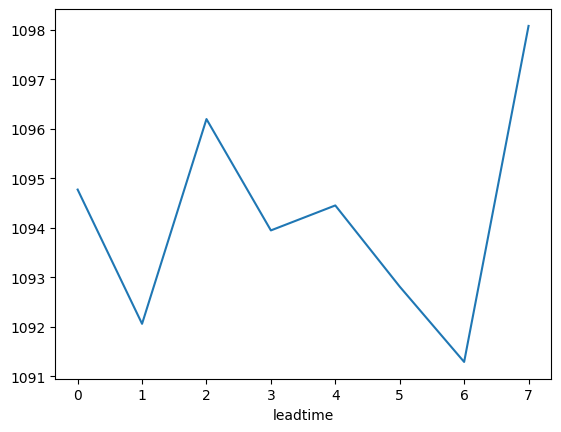

In [27]:
df_compare.groupby("leadtime").mean()["streamflow_f"].plot()

In [20]:
thresh_ra = 1212

In [21]:
df_rf["trig"] = df_rf["streamflow"] >= thresh_ra

In [22]:
df_rf[df_rf["trig"]]["valid_year"].unique()

array([2019, 2022], dtype=int32)

<Axes: xlabel='leadtime'>

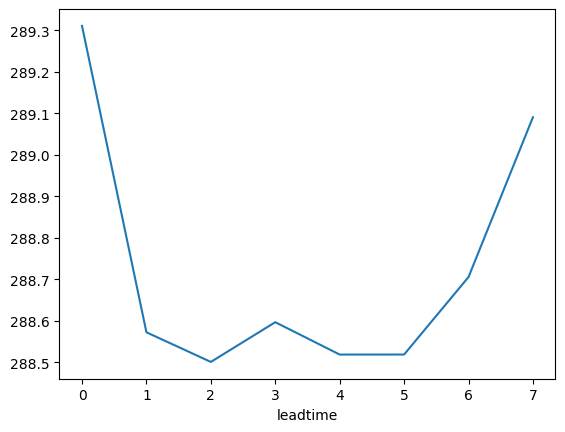

In [30]:
df_rf.groupby("leadtime").mean()["streamflow"].plot()